In [2]:
# Import data from CSV file
# Country-level data, range 1998 to 2018

import pandas as pd
import numpy as np
import os
os.chdir("/Users/paulbogowicz/Documents/Research/Oxford University/OpenPrescribing - antidepressants/Data")

df = pd.read_csv("antidepressants_pca_data.csv")

# Rename columns and rearrange data

df = df.drop(columns={"bnf_code","chemical_substance"})
df = df.rename(columns={"year":"Year","drug_name":"Form","items":"Items"})
df = df.set_index("Form")
df = df.drop({"HealthAid_5-HTP Tab 50mg"},axis=0)
df = df.reset_index()
df = df.pivot(index = "Year", columns = "Form", values = "Items")
display(df.head())

Form,Allegron_Tab 10mg,Allegron_Tab 25mg,Alventa XL_Cap 150mg,Alventa XL_Cap 75mg,Amitriptyline HCl_Liq Spec 1.25mg/5ml,Amitriptyline HCl_Liq Spec 100mg/5ml,Amitriptyline HCl_Liq Spec 10mg/5ml,Amitriptyline HCl_Liq Spec 150mg/5ml,Amitriptyline HCl_Liq Spec 15mg/5ml,Amitriptyline HCl_Liq Spec 2.5mg/5ml,...,ViePax XL_Tab 75mg,ViePax_Tab 37.5mg,ViePax_Tab 75mg,Vivalan_Tab 50mg,Winfex XL_Cap 150mg,Winfex XL_Cap 75mg,Zispin_SolTab 15mg,Zispin_SolTab 30mg,Zispin_SolTab 45mg,Zispin_Tab 30mg
Year,,,,,,,,,,,,,,,,,,,,,
1998,23800.0,27100.0,NaN,NaN,NaN,NaN,500.0,NaN,NaN,NaN,...,NaN,NaN,NaN,1100.0,NaN,NaN,NaN,NaN,NaN,90000.0
1999,27800.0,28100.0,NaN,NaN,NaN,NaN,700.0,NaN,NaN,NaN,...,NaN,NaN,NaN,1100.0,NaN,NaN,NaN,NaN,NaN,167000.0
2000,39240.0,30437.0,NaN,NaN,NaN,NaN,735.0,NaN,NaN,NaN,...,NaN,NaN,NaN,713.0,NaN,NaN,NaN,NaN,NaN,273534.0
2001,41420.0,33920.0,NaN,NaN,NaN,NaN,993.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,430271.0
2002,44425.0,36200.0,NaN,NaN,NaN,NaN,1237.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,609600.0


In [7]:
# Lists for each form of interest, combining caps/tabs but not IR and MR/XL
# Note: liquid formulations and combination preparations have been excluded

# Citalopram

Cita10 = list(["Cipramil_Tab 10mg","Citalopram Hydrob_Tab 10mg"])
Cita20 = list(["Cipramil_Tab 20mg","Citalopram Hydrob_Tab 20mg"])
Cita40 = list(["Cipramil_Tab 40mg","Citalopram Hydrob_Tab 40mg"])
Cita = Cita10 + Cita20 + Cita40

# Amitriptyline

Amit10 = list(["Amitriptyline HCl_Tab 10mg","Domical_Tab 10mg","Elavil_Tab 10mg","Tryptizol_Tab 10mg"])
Amit25 = list(["Amitriptyline HCl_Tab 25mg","Domical_Tab 25mg","Elavil_Tab 25mg","Lentizol_Cap 25mg","Tryptizol_Tab 25mg"])
Amit50 = list(["Amitriptyline HCl_Tab 50mg","Domical_Tab 50mg","Lentizol_Cap 50mg","Tryptizol_Tab 50mg"])
Amit = Amit10 + Amit25 + Amit50

# Sertraline

Sert50 = list(["Aremis_Tab 50mg","Besitron_Tab 50mg","Lustral_Tab 50mg","Sertraline HCl_Tab 50mg"])
Sert100 = list(["Besitron_Tab 100mg","Lustral_Tab 100mg","Sertraline HCl_Tab 100mg"])
Sert = Sert50 + Sert100

# Mirtazapine

Mirt15 = list(["Mirtazapine_Orodisper Tab 15mg","Mirtazapine_Orodisper Tab 15mg S/F","Mirtazapine_Tab 15mg","Zispin_SolTab 15mg"])
Mirt30 = list(["Mirtazapine_Orodisper Tab 30mg","Mirtazapine_Tab 30mg","Zispin_SolTab 30mg","Zispin_Tab 30mg"])
Mirt45 = list(["Mirtazapine_Orodisper Tab 45mg","Mirtazapine_Orodisper Tab 45mg S/F","Mirtazapine_Tab 45mg","Zispin_SolTab 45mg"])
Mirt = Mirt15 + Mirt30 + Mirt45

# Fluoxetine

Fluo10 = list(["Fluoxetine HCl_Cap 10mg","Fluoxetine HCl_Tab 10mg","Fluoxetine HCl_Tab 10mg (Old)"])
Fluo20 = list(["Felicium_Cap 20mg","Fluoxetine HCl_Cap 20mg","Olena_Tab Disper 20mg","Oxactin_Cap 20mg","Prozac_Cap 20mg","Ranflutin_Cap 20mg"])
Fluo30 = list(["Fluoxetine HCl_Cap 30mg"])
Fluo40 = list(["Fluoxetine HCl_Cap 40mg"])
Fluo60 = list(["Fluoxetine HCl_Cap 60mg","Prozac 60_Cap 60mg"])
Fluo = Fluo10 + Fluo20 + Fluo30 + Fluo40 + Fluo60

# Venlafaxine IR

Venl37 = list(["Efexor_Tab 37.5mg","Venlafaxine_Tab 37.5mg","ViePax_Tab 37.5mg"])
Venl50 = list(["Efexor_Tab 50mg"])
Venl75 = list(["Efexor_Tab 75mg","Venlafaxine_Tab 75mg","ViePax_Tab 75mg"])
Venl = Venl37 + Venl50 + Venl75

# Venlafaxine XL/MR

VenlXL37 = list(["Vencarm XL_Cap 37.5mg","Venlablue XL_Cap 37.5mg","Venlalic XL_Tab 37.5mg"])
VenlXL75 = list(["Alventa XL_Cap 75mg","Amphero XL_Cap 75mg","Bonilux XL_Cap 75mg","Depefex XL_Cap 75mg","Efexor XL_Cap 75mg","Foraven XL_Cap 75mg","Mentaven XL_Cap 75mg","Politid XL_Cap 75mg","Ranfaxine XL_Cap 75mg","Rodomel XL_Cap 75mg","Sunveniz XL_Tab 75mg","Tardcaps XL_Cap 75mg","Tifaxin XL_Cap 75mg","Tonpular XL_Cap 75mg","Trixat XL_Cap 75mg","Vaxalin XL_Cap 75mg","Venaxx XL_Cap 75mg","Vencarm XL_Cap 75mg","Venlablue XL_Cap 75mg","Venladex XL_Tab 75mg","Venlafaxine_Cap 75mg M/R","Venlalic XL_Tab 75mg","Venlaneo XL_Cap 75mg","Venlasov XL_Cap 75mg","Vensir XL_Cap 75mg","Vexarin XL_Cap 75mg","ViePax XL_Tab 75mg","Winfex XL_Cap 75mg","Venzip XL_Cap 75mg"])
VenlXL150 = list(["Alventa XL_Cap 150mg","Amphero XL_Cap 150mg","Bonilux XL_Cap 150mg","Depefex XL_Cap 150mg","Efexor XL_Cap 150mg","Foraven XL_Cap 150mg","Mentaven XL_Cap 150mg","Politid XL_Cap 150mg","Ranfaxine XL_Cap 150mg","Rodomel XL_Cap 150mg","Sunveniz XL_Tab 150mg","Tardcaps XL_Cap 150mg","Tifaxin XL_Cap 150mg","Tonpular XL_Cap 150mg","Trixat XL_Cap 150mg","Vaxalin XL_Cap 150mg","Venaxx XL_Cap 150mg","Vencarm XL_Cap 150mg","Venlablue XL_Cap 150mg","Venladex XL_Tab 150mg","Venlafaxine_Cap 150mg M/R","Venlalic XL_Tab 150mg","Venlaneo XL_Cap 150mg","Venlasov XL_Cap 150mg","Vensir XL_Cap 150mg","Vexarin XL_Cap 150mg","ViePax XL_Tab 150mg","Winfex XL_Cap 150mg","Venzip XL_Cap 150mg"])
VenlXL225 = list(["Efexor XL_Cap 225mg","Vencarm XL_Cap 225mg","Venlafaxine_Cap 225mg M/R","Venlalic XL_Tab 225mg","Vensir XL_Cap 225mg","Venladex XL_Tab 225mg"])
VenlXL = VenlXL37 + VenlXL75 + VenlXL150 + VenlXL225

# Duloxetine

Dulo30 = list(["Cymbalta_Cap G/R 30mg","Duciltia_Cap G/R 30mg","Duloxetine HCl_Cap G/R 30mg","Depalta_Cap G/R 30mg"])
Dulo60 = list(["Cymbalta_Cap G/R 60mg","Duciltia_Cap G/R 60mg","Duloxetine HCl_Cap G/R 60mg","Depalta_Cap G/R 60mg"])
Dulo = Dulo30 + Dulo60

# Paroxetine

Paro10 = list(["Paroxetine HCl_Tab 10mg","Seroxat_Tab 10mg"])
Paro20 = list(["Paroxetine HCl_Tab 20mg","Seroxat_Tab 20mg"])
Paro30 = list(["Paroxetine HCl_Tab 30mg","Seroxat_Tab 30mg"])
Paro40 = list(["Paroxetine HCl_Tab 40mg"])
Paro = Paro10 + Paro20 + Paro30 + Paro40

# Trazodone

Traz50 = list(["Molipaxin_Cap 50mg","Trazodone HCl_Cap 50mg"])
Traz100 = list(["Molipaxin_Cap 100mg","Trazodone HCl_Cap 100mg"])
Traz150 = list(["Molipaxin CR_Tab 150mg","Molipaxin_Tab 150mg","Trazodone HCl_Tab 150mg"])
Traz = Traz50 + Traz100 + Traz150

# Escitalopram

Esci5 = list(["Cipralex_Tab 5mg","Escitalopram_Tab 5mg"])
Esci10 = list(["Cipralex_Tab 10mg","Escitalopram_Tab 10mg"])
Esci20 = list(["Cipralex_Tab 20mg","Escitalopram_Tab 20mg"])
Esci = Esci5 + Esci10 + Esci20

# Calculate total numbers of items for each preparation and total per drug

# Citalopram

df["Cita10"] = df.reindex(columns=Cita10).sum(axis=1)
df["Cita20"] = df.reindex(columns=Cita20).sum(axis=1)
df["Cita40"] = df.reindex(columns=Cita40).sum(axis=1)
df["Cita"] = df.reindex(columns=Cita).sum(axis=1)

# Amitriptyline

df["Amit10"] = df.reindex(columns=Amit10).sum(axis=1)
df["Amit25"] = df.reindex(columns=Amit25).sum(axis=1)
df["Amit50"] = df.reindex(columns=Amit50).sum(axis=1)
df["Amit"] = df.reindex(columns=Amit).sum(axis=1)

# Sertraline

df["Sert50"] = df.reindex(columns=Sert50).sum(axis=1)
df["Sert100"] = df.reindex(columns=Sert100).sum(axis=1)
df["Sert"] = df.reindex(columns=Sert).sum(axis=1)

# Mirtazapine

df["Mirt15"] = df.reindex(columns=Mirt15).sum(axis=1)
df["Mirt30"] = df.reindex(columns=Mirt30).sum(axis=1)
df["Mirt45"] = df.reindex(columns=Mirt45).sum(axis=1)
df["Mirt"] = df.reindex(columns=Mirt).sum(axis=1)

# Fluoxetine

df["Fluo10"] = df.reindex(columns=Fluo10).sum(axis=1)
df["Fluo20"] = df.reindex(columns=Fluo20).sum(axis=1)
df["Fluo30"] = df.reindex(columns=Fluo30).sum(axis=1)
df["Fluo40"] = df.reindex(columns=Fluo40).sum(axis=1)
df["Fluo60"] = df.reindex(columns=Fluo60).sum(axis=1)
df["Fluo"] = df.reindex(columns=Fluo).sum(axis=1)

# Venlafaxine IR

df["Venl37"] = df.reindex(columns=Venl37).sum(axis=1)
df["Venl50"] = df.reindex(columns=Venl50).sum(axis=1)
df["Venl75"] = df.reindex(columns=Venl75).sum(axis=1)
df["Venl"] = df.reindex(columns=Venl).sum(axis=1)

# Venlafaxine XL/MR

df["VenlXL37"] = df.reindex(columns=VenlXL37).sum(axis=1)
df["VenlXL75"] = df.reindex(columns=VenlXL75).sum(axis=1)
df["VenlXL150"] = df.reindex(columns=VenlXL150).sum(axis=1)
df["VenlXL225"] = df.reindex(columns=VenlXL225).sum(axis=1)
df["VenlXL"] = df.reindex(columns=VenlXL).sum(axis=1)

# Duloxetine

df["Dulo30"] = df.reindex(columns=Dulo30).sum(axis=1)
df["Dulo60"] = df.reindex(columns=Dulo60).sum(axis=1)
df["Dulo"] = df.reindex(columns=Dulo).sum(axis=1)

# Paroxetine

df["Paro10"] = df.reindex(columns=Paro10).sum(axis=1)
df["Paro20"] = df.reindex(columns=Paro20).sum(axis=1)
df["Paro30"] = df.reindex(columns=Paro30).sum(axis=1)
df["Paro40"] = df.reindex(columns=Paro40).sum(axis=1)
df["Paro"] = df.reindex(columns=Paro).sum(axis=1)

# Trazodone

df["Traz50"] = df.reindex(columns=Traz50).sum(axis=1)
df["Traz100"] = df.reindex(columns=Traz100).sum(axis=1)
df["Traz150"] = df.reindex(columns=Traz150).sum(axis=1)
df["Traz"] = df.reindex(columns=Traz).sum(axis=1)

# Escitalopram

df["Esci5"] = df.reindex(columns=Esci5).sum(axis=1)
df["Esci10"] = df.reindex(columns=Esci10).sum(axis=1)
df["Esci20"] = df.reindex(columns=Esci20).sum(axis=1)
df["Esci"] = df.reindex(columns=Esci).sum(axis=1)

# Calculate percentages for each preparation (drug total)

# Citalopram

df["Cita10 %"] = 100*df["Cita10"]/df["Cita"]
df["Cita20 %"] = 100*df["Cita20"]/df["Cita"]
df["Cita40 %"] = 100*df["Cita40"]/df["Cita"]

# Amitriptyline

df["Amit10 %"] = 100*df["Amit10"]/df["Amit"]
df["Amit25 %"] = 100*df["Amit25"]/df["Amit"]
df["Amit50 %"] = 100*df["Amit50"]/df["Amit"]

# Sertraline

df["Sert50 %"] = 100*df["Sert50"]/df["Sert"]
df["Sert100 %"] = 100*df["Sert100"]/df["Sert"]

# Mirtazapine

df["Mirt15 %"] = 100*df["Mirt15"]/df["Mirt"]
df["Mirt30 %"] = 100*df["Mirt30"]/df["Mirt"]
df["Mirt45 %"] = 100*df["Mirt45"]/df["Mirt"]

# Fluoxetine

df["Fluo10 %"] = 100*df["Fluo10"]/df["Fluo"]
df["Fluo20 %"] = 100*df["Fluo20"]/df["Fluo"]
df["Fluo30 %"] = 100*df["Fluo30"]/df["Fluo"]
df["Fluo40 %"] = 100*df["Fluo40"]/df["Fluo"]
df["Fluo60 %"] = 100*df["Fluo60"]/df["Fluo"]

# Venlafaxine IR

df["Venl37 %"] = 100*df["Venl37"]/df["Venl"]
df["Venl50 %"] = 100*df["Venl50"]/df["Venl"]
df["Venl75 %"] = 100*df["Venl75"]/df["Venl"]

# Venlafaxine XL/MR

df["VenlXL37 %"] = 100*df["VenlXL37"]/df["VenlXL"]
df["VenlXL75 %"] = 100*df["VenlXL75"]/df["VenlXL"]
df["VenlXL150 %"] = 100*df["VenlXL150"]/df["VenlXL"]
df["VenlXL225 %"] = 100*df["VenlXL225"]/df["VenlXL"]

# Duloxetine

df["Dulo30 %"] = 100*df["Dulo30"]/df["Dulo"]
df["Dulo60 %"] = 100*df["Dulo60"]/df["Dulo"]

# Paroxetine

df["Paro10 %"] = 100*df["Paro10"]/df["Paro"]
df["Paro20 %"] = 100*df["Paro20"]/df["Paro"]
df["Paro30 %"] = 100*df["Paro30"]/df["Paro"]
df["Paro40 %"] = 100*df["Paro40"]/df["Paro"]

# Trazodone

df["Traz50 %"] = 100*df["Traz50"]/df["Traz"]
df["Traz100 %"] = 100*df["Traz100"]/df["Traz"]
df["Traz150 %"] = 100*df["Traz150"]/df["Traz"]

# Escitalopram

df["Esci5 %"] = 100*df["Esci5"]/df["Esci"]
df["Esci10 %"] = 100*df["Esci10"]/df["Esci"]
df["Esci20 %"] = 100*df["Esci20"]/df["Esci"]

# # View changes in fluoxetine over time
# df[["Fluo10 %","Fluo20 %","Fluo30 %","Fluo40 %","Fluo60 %"]].head(21)

# # View changes in amitriptyline 10 mg preparation over time
# df["Amit10 %"].head(21)

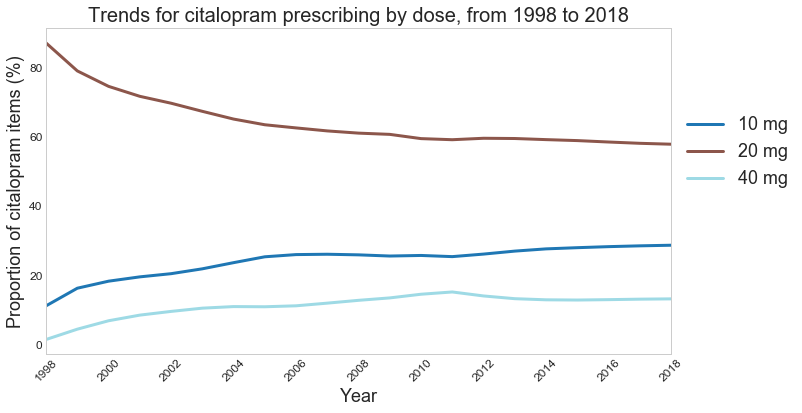

In [4]:
# Produce graph of citalopram dose prescribing - proportions

import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import seaborn as sns

dfCita = df.reindex(columns=["Cita10 %","Cita20 %","Cita40 %"])
dfCita = dfCita.rename(columns={"Cita10 %":"10 mg","Cita20 %":"20 mg","Cita40 %":"40 mg"})

# Plot

sns.set_style("whitegrid",{'grid.color': '.9'})
ax1 = dfCita.plot(kind = "line", linewidth = 3, cmap = "tab20",figsize=(14, 6)) # can also do as kind = "area"
ax1.set_xlabel('Year', fontsize="18")
ax1.set_ylabel("Proportion of citalopram items (%)", size="18")
ax1.set_title("Trends for citalopram prescribing by dose, from 1998 to 2018", size="20")
ax1.set_xticks(np.arange(1998, 2019, step=2))
plt.xticks(rotation=45)
ax1.tick_params(labelsize=12)
ax1.get_yaxis().get_offset_text().set_visible(False)
ax1.set_xlim([1998,2018])
handles, labels = ax1.get_legend_handles_labels()
box = ax1.get_position()
ax1.set_position([box.x0, box.y0, box.width * 0.8, box.height])
ax1.legend(loc='center left', bbox_to_anchor=(1, .62), fontsize='18')
ax1.grid(False)

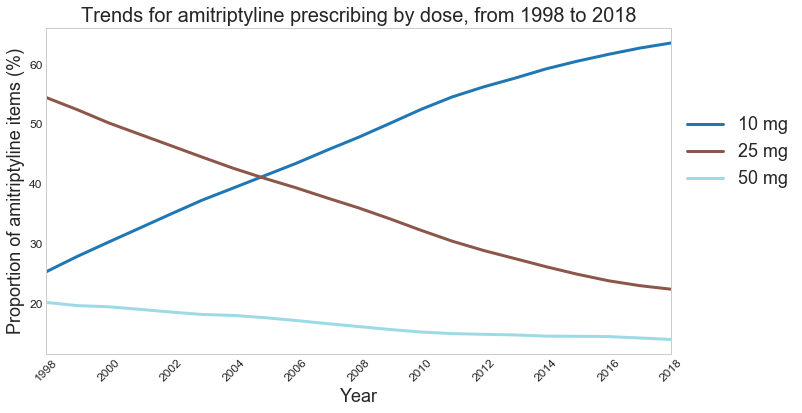

In [6]:
# Produce graph of amitriptyline dose prescribing - proportions

dfAmit = df.reindex(columns=["Amit10 %","Amit25 %","Amit50 %"])
dfAmit = dfAmit.rename(columns={"Amit10 %":"10 mg","Amit25 %":"25 mg","Amit50 %":"50 mg"})

# Plot

sns.set_style("whitegrid",{'grid.color': '.9'})
ax2 = dfAmit.plot(kind = "line", linewidth = 3, cmap = "tab20",figsize=(14, 6)) # can also do as kind = "area"
ax2.set_xlabel('Year', fontsize="18")
ax2.set_ylabel("Proportion of amitriptyline items (%)", size="18")
ax2.set_title("Trends for amitriptyline prescribing by dose, from 1998 to 2018", size="20")
ax2.set_xticks(np.arange(1998, 2019, step=2))
plt.xticks(rotation=45)
ax2.tick_params(labelsize=12)
ax2.get_yaxis().get_offset_text().set_visible(False)
ax2.set_xlim([1998,2018])
handles, labels = ax2.get_legend_handles_labels()
box = ax2.get_position()
ax2.set_position([box.x0, box.y0, box.width * 0.8, box.height])
ax2.legend(loc='center left', bbox_to_anchor=(1, .62), fontsize='18')
ax2.grid(False)

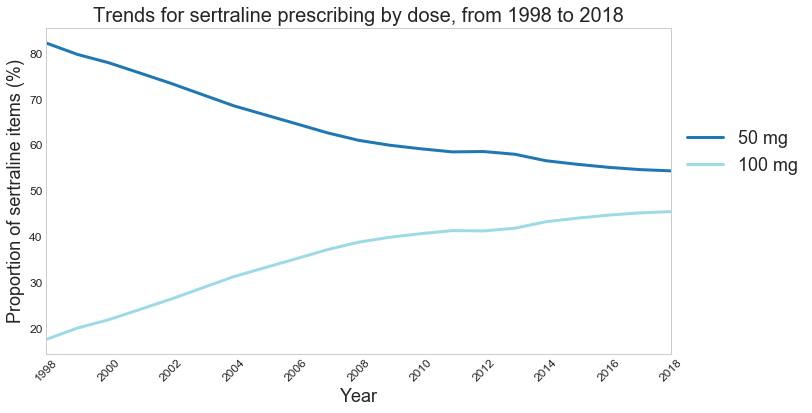

In [7]:
# Produce graph of sertraline dose prescribing - proportions

dfSert = df.reindex(columns=["Sert50 %","Sert100 %"])
dfSert = dfSert.rename(columns={"Sert50 %":"50 mg","Sert100 %":"100 mg"})

# Plot

sns.set_style("whitegrid",{'grid.color': '.9'})
ax3 = dfSert.plot(kind = "line", linewidth = 3, cmap = "tab20",figsize=(14, 6)) # can also do as kind = "area"
ax3.set_xlabel('Year', fontsize="18")
ax3.set_ylabel("Proportion of sertraline items (%)", size="18")
ax3.set_title("Trends for sertraline prescribing by dose, from 1998 to 2018", size="20")
ax3.set_xticks(np.arange(1998, 2019, step=2))
plt.xticks(rotation=45)
ax3.tick_params(labelsize=12)
ax3.get_yaxis().get_offset_text().set_visible(False)
ax3.set_xlim([1998,2018])
handles, labels = ax3.get_legend_handles_labels()
box = ax3.get_position()
ax3.set_position([box.x0, box.y0, box.width * 0.8, box.height])
ax3.legend(loc='center left', bbox_to_anchor=(1, .62), fontsize='18')
ax3.grid(False)

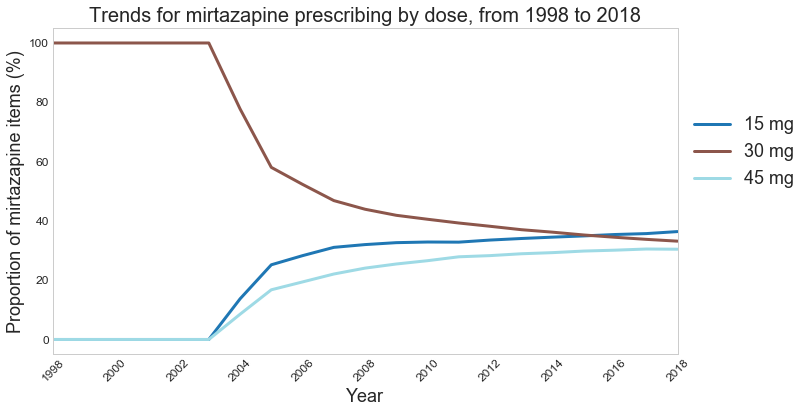

In [8]:
# Produce graph of mirtazapine dose prescribing - proportions

dfMirt = df.reindex(columns=["Mirt15 %","Mirt30 %","Mirt45 %"])
dfMirt = dfMirt.rename(columns={"Mirt15 %":"15 mg","Mirt30 %":"30 mg","Mirt45 %":"45 mg"})

# Plot

sns.set_style("whitegrid",{'grid.color': '.9'})
ax4 = dfMirt.plot(kind = "line", linewidth = 3, cmap = "tab20",figsize=(14, 6)) # can also do as kind = "area"
ax4.set_xlabel('Year', fontsize="18")
ax4.set_ylabel("Proportion of mirtazapine items (%)", size="18")
ax4.set_title("Trends for mirtazapine prescribing by dose, from 1998 to 2018", size="20")
ax4.set_xticks(np.arange(1998, 2019, step=2))
plt.xticks(rotation=45)
ax4.tick_params(labelsize=12)
ax4.get_yaxis().get_offset_text().set_visible(False)
ax4.set_xlim([1998,2018])
handles, labels = ax4.get_legend_handles_labels()
box = ax4.get_position()
ax4.set_position([box.x0, box.y0, box.width * 0.8, box.height])
ax4.legend(loc='center left', bbox_to_anchor=(1, .62), fontsize='18')
ax4.grid(False)

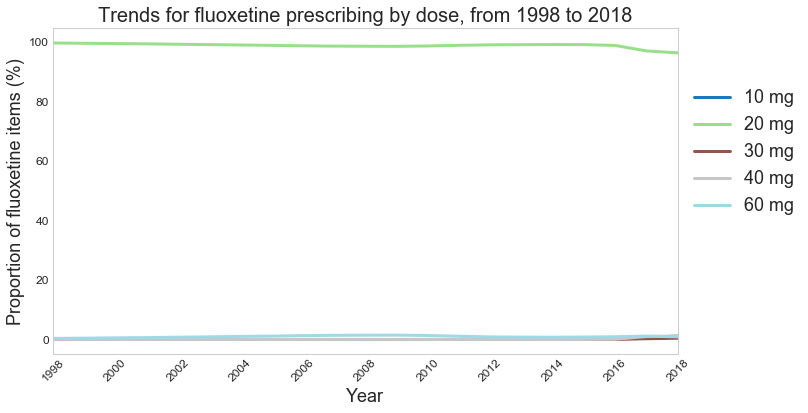

In [9]:
# Produce graph of fluoxetine dose prescribing - proportions

dfFluo = df.reindex(columns=["Fluo10 %","Fluo20 %","Fluo30 %","Fluo40 %","Fluo60 %"])
dfFluo = dfFluo.rename(columns={"Fluo10 %":"10 mg","Fluo20 %":"20 mg","Fluo30 %":"30 mg","Fluo40 %":"40 mg","Fluo60 %":"60 mg"})

# Plot

sns.set_style("whitegrid",{'grid.color': '.9'})
ax5 = dfFluo.plot(kind = "line", linewidth = 3, cmap = "tab20",figsize=(14, 6)) # can also do as kind = "area"
ax5.set_xlabel('Year', fontsize="18")
ax5.set_ylabel("Proportion of fluoxetine items (%)", size="18")
ax5.set_title("Trends for fluoxetine prescribing by dose, from 1998 to 2018", size="20")
ax5.set_xticks(np.arange(1998, 2019, step=2))
plt.xticks(rotation=45)
ax5.tick_params(labelsize=12)
ax5.get_yaxis().get_offset_text().set_visible(False)
ax5.set_xlim([1998,2018])
handles, labels = ax5.get_legend_handles_labels()
box = ax5.get_position()
ax5.set_position([box.x0, box.y0, box.width * 0.8, box.height])
ax5.legend(loc='center left', bbox_to_anchor=(1, .62), fontsize='18')
ax5.grid(False)

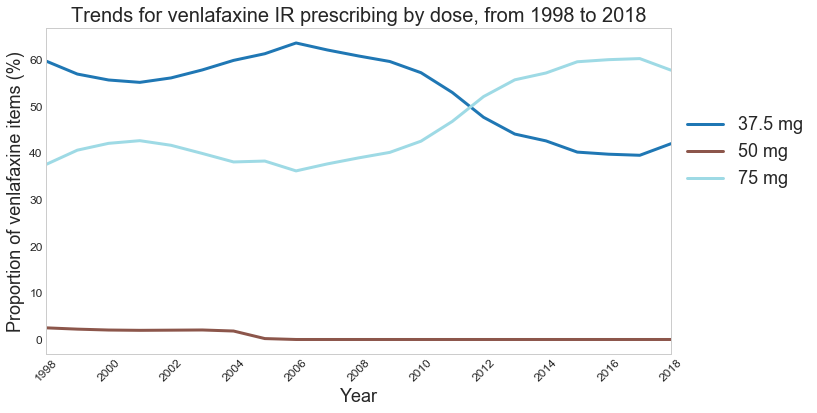

In [10]:
# Produce graph of venlafaxine IR dose prescribing - proportions

dfVenl = df.reindex(columns=["Venl37 %","Venl50 %","Venl75 %"])
dfVenl = dfVenl.rename(columns={"Venl37 %":"37.5 mg","Venl50 %":"50 mg","Venl75 %":"75 mg"})

# Plot

sns.set_style("whitegrid",{'grid.color': '.9'})
ax6 = dfVenl.plot(kind = "line", linewidth = 3, cmap = "tab20",figsize=(14, 6)) # can also do as kind = "area"
ax6.set_xlabel('Year', fontsize="18")
ax6.set_ylabel("Proportion of venlafaxine items (%)", size="18")
ax6.set_title("Trends for venlafaxine IR prescribing by dose, from 1998 to 2018", size="20")
ax6.set_xticks(np.arange(1998, 2019, step=2))
plt.xticks(rotation=45)
ax6.tick_params(labelsize=12)
ax6.get_yaxis().get_offset_text().set_visible(False)
ax6.set_xlim([1998,2018])
handles, labels = ax6.get_legend_handles_labels()
box = ax6.get_position()
ax6.set_position([box.x0, box.y0, box.width * 0.8, box.height])
ax6.legend(loc='center left', bbox_to_anchor=(1, .62), fontsize='18')
ax6.grid(False)

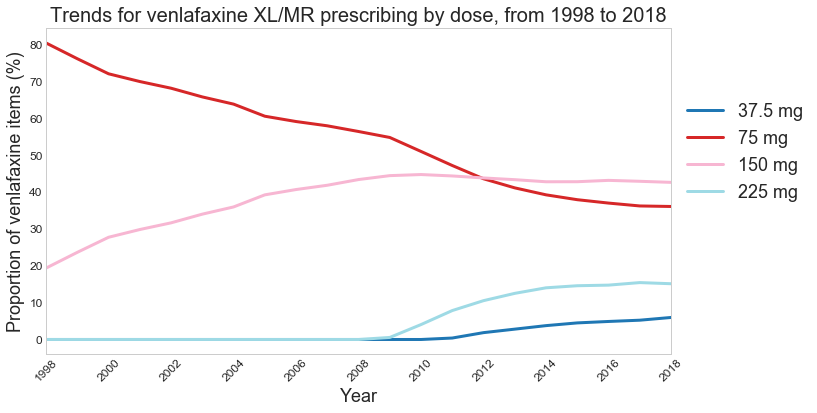

In [11]:
# Produce graph of venlafaxine XL/MR dose prescribing - proportions

dfVenlXL = df.reindex(columns=["VenlXL37 %","VenlXL75 %","VenlXL150 %","VenlXL225 %"])
dfVenlXL = dfVenlXL.rename(columns={"VenlXL37 %":"37.5 mg","VenlXL75 %":"75 mg","VenlXL150 %":"150 mg","VenlXL225 %":"225 mg"})

# Plot

sns.set_style("whitegrid",{'grid.color': '.9'})
ax7 = dfVenlXL.plot(kind = "line", linewidth = 3, cmap = "tab20",figsize=(14, 6)) # can also do as kind = "area"
ax7.set_xlabel('Year', fontsize="18")
ax7.set_ylabel("Proportion of venlafaxine items (%)", size="18")
ax7.set_title("Trends for venlafaxine XL/MR prescribing by dose, from 1998 to 2018", size="20")
ax7.set_xticks(np.arange(1998, 2019, step=2))
plt.xticks(rotation=45)
ax7.tick_params(labelsize=12)
ax7.get_yaxis().get_offset_text().set_visible(False)
ax7.set_xlim([1998,2018])
handles, labels = ax7.get_legend_handles_labels()
box = ax7.get_position()
ax7.set_position([box.x0, box.y0, box.width * 0.8, box.height])
ax7.legend(loc='center left', bbox_to_anchor=(1, .62), fontsize='18')
ax7.grid(False)

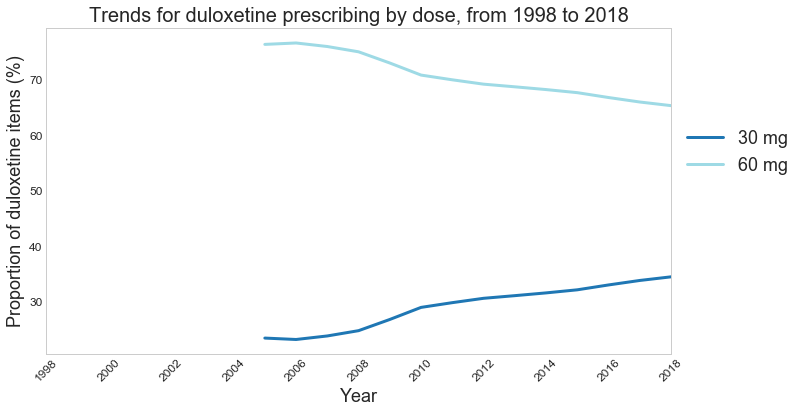

In [12]:
# Produce graph of duloxetine dose prescribing - proportions

dfDulo = df.reindex(columns=["Dulo30 %","Dulo60 %"])
dfDulo = dfDulo.rename(columns={"Dulo30 %":"30 mg","Dulo60 %":"60 mg"})

# Plot

sns.set_style("whitegrid",{'grid.color': '.9'})
ax8 = dfDulo.plot(kind = "line", linewidth = 3, cmap = "tab20",figsize=(14, 6)) # can also do as kind = "area"
ax8.set_xlabel('Year', fontsize="18")
ax8.set_ylabel("Proportion of duloxetine items (%)", size="18")
ax8.set_title("Trends for duloxetine prescribing by dose, from 1998 to 2018", size="20")
ax8.set_xticks(np.arange(1998, 2019, step=2))
plt.xticks(rotation=45)
ax8.tick_params(labelsize=12)
ax8.get_yaxis().get_offset_text().set_visible(False)
ax8.set_xlim([1998,2018])
handles, labels = ax8.get_legend_handles_labels()
box = ax8.get_position()
ax8.set_position([box.x0, box.y0, box.width * 0.8, box.height])
ax8.legend(loc='center left', bbox_to_anchor=(1, .62), fontsize='18')
ax8.grid(False)

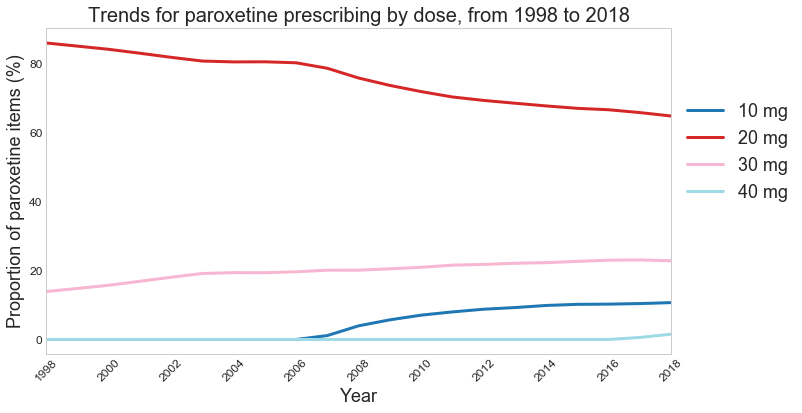

In [13]:
# Produce graph of paroxetine dose prescribing - proportions

dfParo = df.reindex(columns=["Paro10 %","Paro20 %","Paro30 %","Paro40 %"])
dfParo = dfParo.rename(columns={"Paro10 %":"10 mg","Paro20 %":"20 mg","Paro30 %":"30 mg","Paro40 %":"40 mg"})

# Plot

sns.set_style("whitegrid",{'grid.color': '.9'})
ax9 = dfParo.plot(kind = "line", linewidth = 3, cmap = "tab20",figsize=(14, 6)) # can also do as kind = "area"
ax9.set_xlabel('Year', fontsize="18")
ax9.set_ylabel("Proportion of paroxetine items (%)", size="18")
ax9.set_title("Trends for paroxetine prescribing by dose, from 1998 to 2018", size="20")
ax9.set_xticks(np.arange(1998, 2019, step=2))
plt.xticks(rotation=45)
ax9.tick_params(labelsize=12)
ax9.get_yaxis().get_offset_text().set_visible(False)
ax9.set_xlim([1998,2018])
handles, labels = ax9.get_legend_handles_labels()
box = ax9.get_position()
ax9.set_position([box.x0, box.y0, box.width * 0.8, box.height])
ax9.legend(loc='center left', bbox_to_anchor=(1, .62), fontsize='18')
ax9.grid(False)

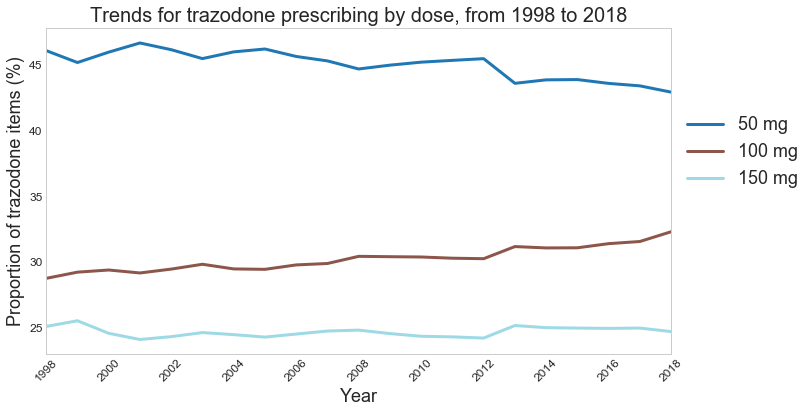

In [14]:
# Produce graph of trazodone dose prescribing - proportions

dfTraz = df.reindex(columns=["Traz50 %","Traz100 %","Traz150 %"])
dfTraz = dfTraz.rename(columns={"Traz50 %":"50 mg","Traz100 %":"100 mg","Traz150 %":"150 mg"})

# Plot

sns.set_style("whitegrid",{'grid.color': '.9'})
ax10 = dfTraz.plot(kind = "line", linewidth = 3, cmap = "tab20",figsize=(14, 6)) # can also do as kind = "area"
ax10.set_xlabel('Year', fontsize="18")
ax10.set_ylabel("Proportion of trazodone items (%)", size="18")
ax10.set_title("Trends for trazodone prescribing by dose, from 1998 to 2018", size="20")
ax10.set_xticks(np.arange(1998, 2019, step=2))
plt.xticks(rotation=45)
ax10.tick_params(labelsize=12)
ax10.get_yaxis().get_offset_text().set_visible(False)
ax10.set_xlim([1998,2018])
handles, labels = ax10.get_legend_handles_labels()
box = ax10.get_position()
ax10.set_position([box.x0, box.y0, box.width * 0.8, box.height])
ax10.legend(loc='center left', bbox_to_anchor=(1, .62), fontsize='18')
ax10.grid(False)

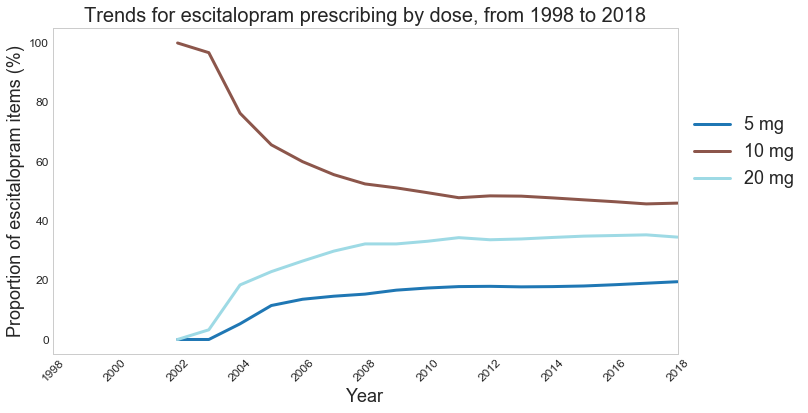

In [15]:
# Produce graph of escitalopram dose prescribing - proportions

dfEsci = df.reindex(columns=["Esci5 %","Esci10 %","Esci20 %"])
dfEsci = dfEsci.rename(columns={"Esci5 %":"5 mg","Esci10 %":"10 mg","Esci20 %":"20 mg"})

# Plot

sns.set_style("whitegrid",{'grid.color': '.9'})
ax11 = dfEsci.plot(kind = "line", linewidth = 3, cmap = "tab20",figsize=(14, 6)) # can also do as kind = "area"
ax11.set_xlabel('Year', fontsize="18")
ax11.set_ylabel("Proportion of escitalopram items (%)", size="18")
ax11.set_title("Trends for escitalopram prescribing by dose, from 1998 to 2018", size="20")
ax11.set_xticks(np.arange(1998, 2019, step=2))
plt.xticks(rotation=45)
ax11.tick_params(labelsize=12)
ax11.get_yaxis().get_offset_text().set_visible(False)
ax11.set_xlim([1998,2018])
handles, labels = ax11.get_legend_handles_labels()
box = ax11.get_position()
ax11.set_position([box.x0, box.y0, box.width * 0.8, box.height])
ax11.legend(loc='center left', bbox_to_anchor=(1, .62), fontsize='18')
ax11.grid(False)

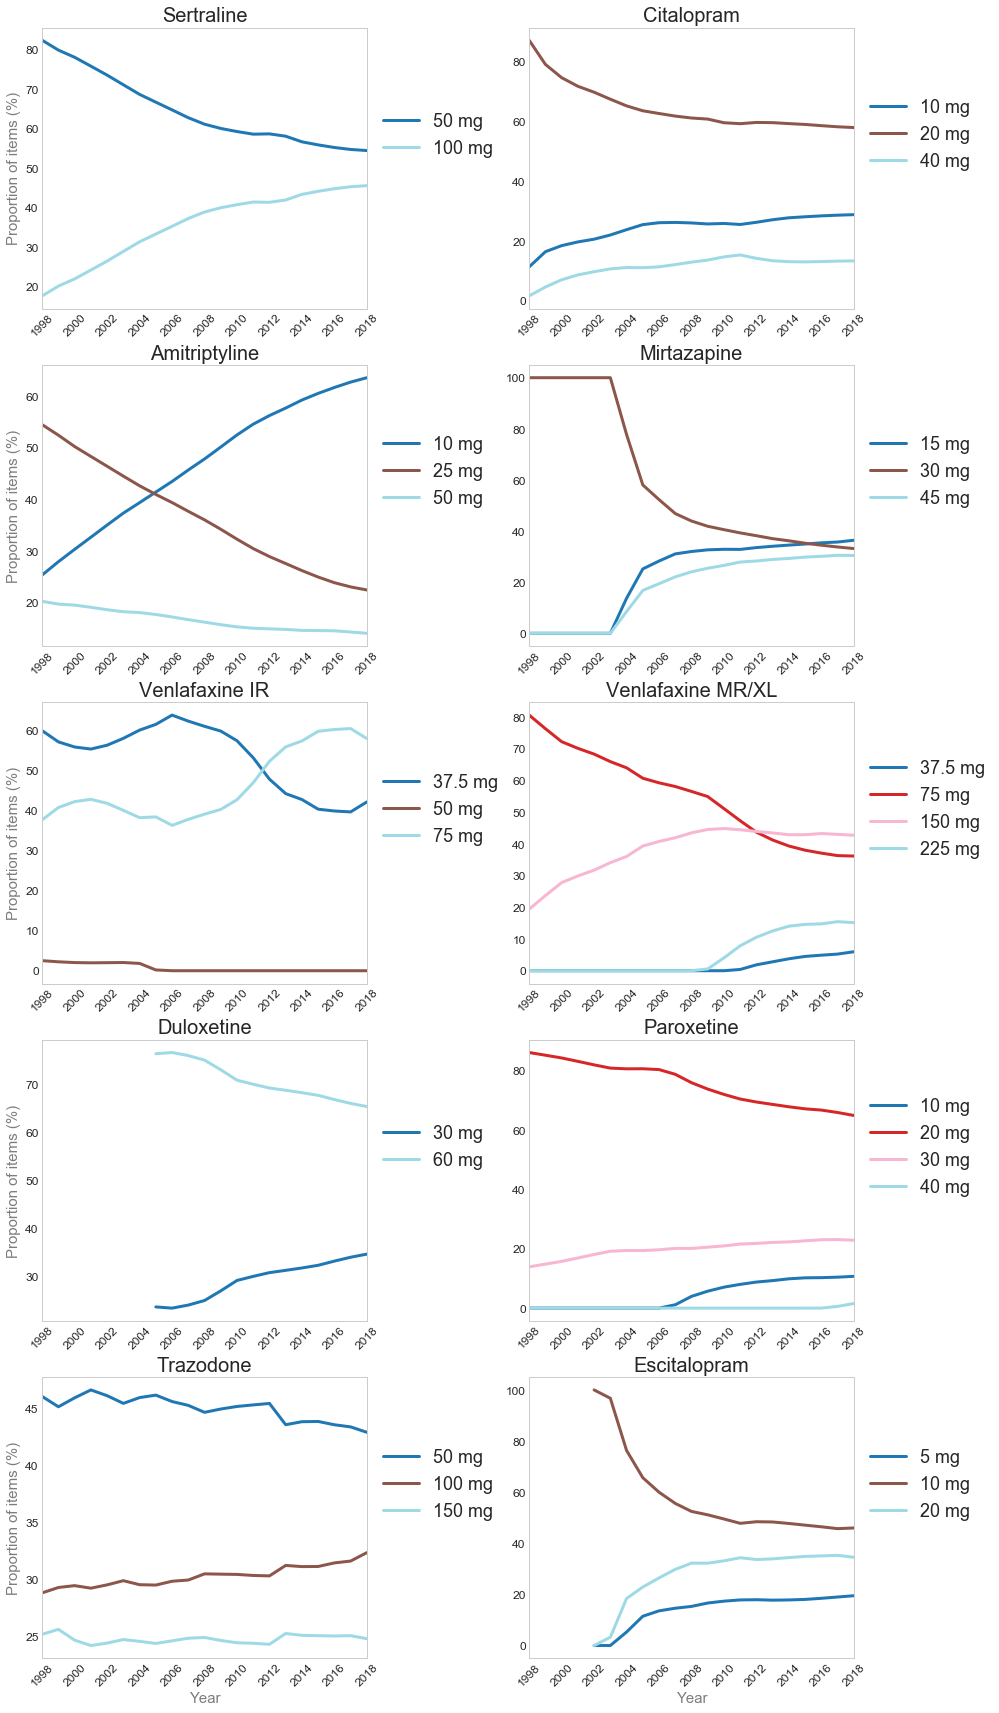

In [21]:
# Combined plot containing top 10, apart from fluoxetine

import matplotlib.gridspec as gridspec
import seaborn as sns


nrow = 5
ncol = 2
df_list = [dfSert, dfCita, dfAmit, dfMirt, dfVenl, dfVenlXL, dfDulo, dfParo, dfTraz, dfEsci]
s = [(0,"Sertraline",0,0), (1,"Citalopram",0,1), (2,"Amitriptyline",1,0), (3,"Mirtazapine",1,1), (4,"Venlafaxine IR",2,0),(5,"Venlafaxine MR/XL",2,1),(6,"Duloxetine",3,0),(7,"Paroxetine",3,1),(8,"Trazodone",4,0),(9,"Escitalopram",4,1)] 

fig, axes = plt.subplots(nrow, ncol, figsize=(16,30))
for i in s:
    ax = df_list[i[0]].plot(kind = "line", linewidth = 3, cmap = "tab20", ax=axes[i[2],i[3]])
    ax.set_title(i[1], size="20")
    ax.set_xticks(np.arange(1998, 2019, step=2))
    ax.tick_params(labelsize=12)
    ax.set_xlim([1998,2018])
    for tick in ax.get_xticklabels():
        tick.set_rotation(45)
    handles, labels = ax.get_legend_handles_labels()
    box = ax.get_position()
    ax.set_position([box.x0, box.y0, box.width * 0.8, box.height])
    ax.legend(loc='center left', bbox_to_anchor=(1, .62), fontsize='18')
    ax.grid(False)
    if i[2]<=3:
        ax.set_xlabel('')
    else:
        ax.set_xlabel('Year',size=15,alpha=0.6)
    if i[3]%2==0:
        ax.set_ylabel('Proportion of items (%)', size =15, alpha=0.6)
plt.savefig("/Users/paulbogowicz/Documents/Research/Oxford University/OpenPrescribing - antidepressants/Figures/Figure 3.pdf",format="pdf",bbox_inches='tight')